# Introduction to Deep Learning in Python

## Import the data.

In [80]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the course datasets 
wages = pd.read_csv('datasets/hourly_wages.csv')
mnist = pd.read_csv('datasets/mnist.csv')
titanic = pd.read_csv('datasets/titanic_all_numeric.csv')

## Input for Chapter 1

In [7]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

input_data = np.array([3, 5])
input_data_multi = np.array([[3, 5], [1, -1], [0, 0], [8, 4]])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}
weights_multi_layer = {'node_0_0': np.array([2, 4]),
                       'node_0_1': np.array([ 4, -5]),
                       'node_1_0': np.array([-1,  2]),
                       'node_1_1': np.array([1, 2]),
                       'output': np.array([2, 7])} 

## Input for Chapter 2

In [81]:
# Define predict_with_network()
def predict_with_network_ch2(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = input_to_final_layer
    
    # Return model output
    return(model_output)

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

def get_slope(input_data, target, weights):
    preds = (input_data * weights).sum()
    error = preds - target
    output = 2 * input_data * error
    return(output)

def get_mse(input_data, target, weights):
    preds = (input_data * weights).sum()
    error = preds - target
    output = (error ** 2).mean()
    return(output)

input_data_ch2 = np.array([0, 3])
input_data_ch2_multi = np.array([[0, 3], [1, 2], [-1, -2], [4, 0]])
input_data_ch2_1 = np.array([[1, 2, 3]]) 
weights_ch2_0 = {'node_0': np.array([2, 1]),
                 'node_1': np.array([1, 2]),
                 'output': np.array([1, 1])}
weights_ch2_1 = {'node_0': np.array([2, 1]),
                 'node_1': np.array([1. , 1.5]),
                 'output': np.array([1. , 1.5])}
weights_ch2_2 = np.array([[0, 2, 1]])
target_0 = 0

## Input for Chapter 3

In [ ]:
#no input required

## Input for Chapter 4

## Chapter 1 : Basics of deep learning and neural networks

## The forward propagation algorithm

![1_4](1_4.png) 
![1_4_result](1_4_result.png)


In [28]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


## Add Rectified Linear Activation Function (ReLU)
an "**activation function**" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
<br> relu(3) = 3 <br>relu(-3) = 0

<img src="ReLU.png" width="600" height="400" />

![1_4_result_ReLU](1_4_result_ReLU.png)

In [27]:
# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


## Applying the network to many observations/rows of data

In [26]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = input_to_final_layer
    
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data_multi:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)     

[52, 63, 0, 148]


## Multi-layer neural networks
![multi_result](multi_result.png)

In [25]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights_multi_layer['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)
    
    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights_multi_layer['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights_multi_layer['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights_multi_layer['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights_multi_layer['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


## Chapter 2 : Optimizing a neural network with backward propagation

## Coding how weight changes affect accuracy
input_data_ch2 is [0, 3]

In [24]:
# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network_ch2(input_data_ch2, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network_ch2(input_data_ch2, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


## Scaling up to multiple data points

In [16]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data_ch2_multi:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network_ch2(row, weights_ch2_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network_ch2(row, weights_ch2_1))
    
# The actual target value, used to calculate the error
target_actuals = [1, 3, 5, 7]

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Calculating slopes and improving model weights

it's possible to move too far in that direction. So we will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

In [59]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights_ch2_2 * input_data_ch2_1).sum()

# Calculate the error: error
error = preds - target_0

# Calculate the slope: slope
slope = 2 * input_data_ch2_1 * error

# Update the weights: weights_updated
weights_updated = weights_ch2_2 - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data_ch2_1).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target_0

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


## Making multiple updates to weights

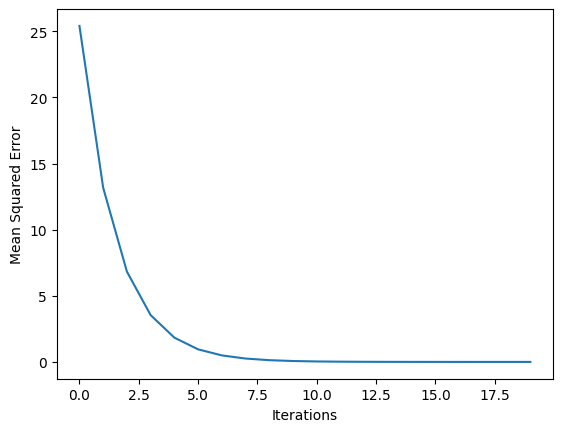

In [56]:
n_updates = 20
mse_hist = []
input_data = np.array([[1, 2, 3]])
weights = np.array([[0, 2, 1]])

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target_0, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target_0, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation
Gradients for weight is product of: <br>
1.Node value feeding into that weight <br>
2.Slope of activation function for the node being fed into <br>
3.Slope of loss function w.r.t output node <br>
<img src="backpropagation.png" width="500" height="500">


## Chapter 3 : Building deep learning models with keras

## Specifying a model

In [31]:
# Everything in wages except for the target(wage_per_hour)
predictors = wages.loc[:,"union":"construction"]

# Convert DataFrame to numpy
predictors = predictors.to_numpy()

print(predictors)

[[ 0  8 21 ...  0  1  0]
 [ 0  9 42 ...  0  1  0]
 [ 0 12  1 ...  0  1  0]
 ...
 [ 1 17 25 ...  0  0  0]
 [ 1 12 13 ...  1  0  0]
 [ 0 16 33 ...  0  1  0]]


In [38]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation = 'relu', input_shape = (n_cols,)))

# Add the second layer
model.add(Dense(32, activation = 'relu'))

# Add the output layer
model.add(Dense(1))


## Compiling the model
Why you need to compile your model:
1. Specify the optimizer:
   * Many options and mathematically complex.
   * "Adam" is usually a good choice.
2. Loss function:
   * "mean_squared_error" is common for regression.

What is fitting a model: 
* Applying backpropagation and gradient descent with your data to update the weights
* Scaling data before fitting can ease optimization


In [37]:
# Everything in wages except for the target(wage_per_hour)
predictors = wages.loc[:,"union":"construction"]

# Convert DataFrame to Numpy
predictors = predictors.to_numpy()

# The target is wage_per_hour
target = wages["wage_per_hour"]

# Convert DataFrame to numpy
target = target.to_numpy()

print(target)

[ 5.1   4.95  6.67  4.    7.5  13.07  4.45 19.47 13.28  8.75 11.35 11.5
  6.5   6.25 19.98  7.3   8.   22.2   3.65 20.55  5.71  7.    3.75  4.5
  9.56  5.75  9.36  6.5   3.35  4.75  8.9   4.    4.7   5.    9.25 10.67
  7.61 10.    7.5  12.2   3.35 11.   12.    4.85  4.3   6.   15.    4.85
  9.    6.36  9.15 11.    4.5   4.8   4.    5.5   8.4   6.75 10.    5.
  6.5  10.75  7.   11.43  4.    9.   13.   12.22  6.28  6.75  3.35 16.
  5.25  3.5   4.22  3.    4.   10.    5.   16.   13.98 13.26  6.1   3.75
  9.    9.45  5.5   8.93  6.25  9.75  6.73  7.78  2.85  3.35 19.98  8.5
  9.75 15.    8.   11.25 14.   10.    6.5   9.83 18.5  12.5  26.   14.
 10.5  11.   12.47 12.5  15.    6.    9.5   5.    3.75 12.57  6.88  5.5
  7.    4.5   6.5  12.    5.    6.5   6.8   8.75  3.75  4.5   6.    5.5
 13.    5.65  4.8   7.    5.25  3.35  8.5   6.    6.75  8.89 14.21 10.78
  8.9   7.5   4.5  11.25 13.45  6.    4.62 10.58  5.    8.2   6.25  8.5
 24.98 16.65  6.25  4.55 11.25 21.25 12.65  7.5  10.25  3.35 13

In [41]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

# Fit the model
model.fit(predictors, target)


Loss function: mean_squared_error
17/17 [==============================] - 0s 967us/step - loss: 62.0539


<img src="Classification.png" width="500" height="500">
<br>
you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!

In [66]:
# Everthing except for the target and convert DataFrame to Numpy
predictors = titanic.loc[:,"pclass":"embarked_from_southampton"].astype('float32').to_numpy()

#Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# The target is in DataFrame
df_survived = titanic["survived"]

print(predictors)

[[ 3.       22.        1.       ...  0.        0.        1.      ]
 [ 1.       38.        1.       ...  1.        0.        0.      ]
 [ 3.       26.        0.       ...  0.        0.        1.      ]
 ...
 [ 3.       29.699118  1.       ...  0.        0.        1.      ]
 [ 1.       26.        0.       ...  1.        0.        0.      ]
 [ 3.       32.        0.       ...  0.        1.        0.      ]]


In [67]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df_survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation = 'relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Fit the model
model.fit(predictors, target)

28/28 [==============================] - 0s 794us/step - loss: 2.4505 - accuracy: 0.5533


<img src="Using-Model.png" width="500" height="500">


In [82]:
# New data to make predictions is stored in a NumPy array as pred_data
pred_data = pd.read_csv('datasets/new_data.csv').to_numpy()

In [86]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# Print predicted_prob_true
print(predicted_prob_true)

3/3 [==============================] - 0s 1ms/step
[0.6258042  0.9999935  0.8328893  0.18285576 0.15459362 0.0270518
 0.34064248 0.15109247 0.9554122  0.2103226  0.3944439  0.15229899
 0.97411156 0.1635433  0.04491682 0.26726082 0.8471573  0.06187454
 0.9354583  0.99776894 0.2126333  0.02935127 0.33264333 0.9916171
 0.17986675 0.971858   0.9855519  0.19335976 0.9840314  0.5729373
 0.9318592  0.18035513 0.24815962 0.33337802 0.99585474 0.29504386
 0.16832143 0.97004765 0.73722726 0.29288995 0.42558676 0.7532828
 0.12705001 0.36275405 0.07420671 0.99465287 0.14166236 0.8184237
 0.99806625 0.9790843  0.00779833 0.6994453  0.9342358  0.34319693
 0.40312567 0.9999973  0.2495068  0.6520284  0.18035515 0.1239796
 0.33154985 0.29723355 0.9945308  0.34733483 0.1354936  0.3523738
 0.9560662  0.19233096 0.8107856  0.21047588 0.9101851  0.09796944
 0.06144775 0.6235796  0.41788775 0.33991957 0.3075342  0.16593562
 0.9911663  0.73366076 0.1381189  0.34468675 0.23048939 0.20695652
 0.7051215  0.2994

In [84]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                352       
                                                                 
 dense_46 (Dense)            (None, 2)                 66        
                                                                 
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________
